## Advanced Project I
## To: Prof. Dr. Stefan Kettemann
## Spring term 2023
### Final Project
### From: Habtegiorgis Mengistie

# Analysis of Wind Energy Time Series in Germany

This data appears to be a table of energy generation in Germany over a 24-hour period from midnight on January 1, 2022. The table contains **35040 rows × 15 columns**, each representing a 15-minute interval, and 12 columns representing different sources of energy generation.

The columns represent the following sources of energy generation:

- Biomass
- Hydropower
- Offshore wind
- Onshore wind
- Photovoltaics
- Other renewable sources
- Nuclear
- Lignite (a type of coal)
- Hard coal
- Fossil gas
- Hydro pumped storage
- Other conventional sources

The values in each column represent the amount of energy generated by that source in MWh (megawatt-hours) during each **15-minute** interval.

But Our task is Only Offshore wind and Onshore wind energy generated

Dataset is Access in [smard.de](https://www.smard.de/en/downloadcenter/download-market-data/?downloadAttributes=%7B"selectedCategory":3,"selectedSubCategory":8,"selectedRegion":false,"selectedFileType":"CSV","from":1640991600000,"to":1672527599999%7D)


### Importing libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno

## Wind Power Generation Dataset

In [ ]:
# Load the dataset
df = pd.read_csv('Wind_Power.csv', delimiter=';')

In [ ]:
df.head()

,Date,Start,End,Biomass [MWh] Original resolutions,Hydropower [MWh] Original resolutions,Wind offshore [MWh] Original resolutions,Wind onshore [MWh] Original resolutions,Photovoltaics [MWh] Original resolutions,Other renewable [MWh] Original resolutions,Nuclear [MWh] Original resolutions,Lignite [MWh] Original resolutions,Hard coal [MWh] Original resolutions,Fossil gas [MWh] Original resolutions,Hydro pumped storage [MWh] Original resolutions,Other conventional [MWh] Original resolutions
0,"Jan 1, 2022",12:00 AM,12:15 AM,"1,084.75",371.75,"1,533","6,433.75",0,37.75,802,899,512,667,191,365.50
1,"Jan 1, 2022",12:15 AM,12:30 AM,"1,081.25",367.50,"1,509.5","6,413.25",0,38,831.25,895.5,510.25,690.25,138.25,366.00
2,"Jan 1, 2022",12:30 AM,12:45 AM,"1,080.75",364.50,"1,490.25","6,312.5",0,38,836,881.5,509.5,689,84.5,363.50
3,"Jan 1, 2022",12:45 AM,1:00 AM,"1,085.25",365.50,"1,442.75","6,328.25",0,38,835.5,886,507.5,688.25,57.5,359.75
4,"Jan 1, 2022",1:00 AM,1:15 AM,"1,083.25",385.75,"1,422","6,212.5",0,38,837.75,891.25,513.25,658.5,122,364.50


### Select only Wind offshore and onshore columns

In [ ]:
# Select only Wind offshore and onshore columns
df = df[['Date', 'Start', 'End', 'Wind offshore [MWh] Original resolutions', 'Wind onshore [MWh] Original resolutions']]

In [ ]:
# Convert the 'Date' column to a pandas datetime object
df['Date'] = pd.to_datetime(df['Date'], format='%b %d, %Y')

# Concatenate the 'Date', 'Start', and 'End' columns into a single column of datetime objects
df['Timestamp'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Start'], format='%Y-%m-%d %I:%M %p')


<ipython-input-5-441c4ca9bf35>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'], format='%b %d, %Y')
<ipython-input-5-441c4ca9bf35>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Timestamp'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Start'], format='%Y-%m-%d %I:%M %p')


In [ ]:
#Drop the 'Date', 'Start', and 'End' columns
df.drop(['Date', 'Start', 'End'], axis=1, inplace=True)

<ipython-input-6-634ec5ec9cf5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Date', 'Start', 'End'], axis=1, inplace=True)


In [ ]:
df

,Wind offshore [MWh] Original resolutions,Wind onshore [MWh] Original resolutions,Timestamp
0,"1,533","6,433.75",2022-01-01 00:00:00
1,"1,509.5","6,413.25",2022-01-01 00:15:00
2,"1,490.25","6,312.5",2022-01-01 00:30:00
3,"1,442.75","6,328.25",2022-01-01 00:45:00
4,"1,422","6,212.5",2022-01-01 01:00:00
...,...,...,...
35035,874.75,"7,660.5",2022-12-31 22:45:00
35036,842.5,"7,390.25",2022-12-31 23:00:00
35037,852.25,"7,356",2022-12-31 23:15:00
35038,842.25,"7,301.75",2022-12-31 23:30:00


In [ ]:
# Extract only the 'Wind offshore [MWh]' and 'Wind onshore [MWh]' columns
df = df.loc[:, ['Timestamp', 'Wind offshore [MWh] Original resolutions', 'Wind onshore [MWh] Original resolutions']]

In [ ]:
df.columns = ["Datetime", "Wind_offshore", "Wind_onshore"]
df.head()

,Datetime,Wind_offshore,Wind_onshore
0,2022-01-01 00:00:00,"1,533","6,433.75"
1,2022-01-01 00:15:00,"1,509.5","6,413.25"
2,2022-01-01 00:30:00,"1,490.25","6,312.5"
3,2022-01-01 00:45:00,"1,442.75","6,328.25"
4,2022-01-01 01:00:00,"1,422","6,212.5"


## Germany Electricity price [€/MWh] Dataset

In [ ]:
# Load the dataset
df2 = pd.read_csv('Day-ahead_prices_202201010000_202212312359_Quarterhour.csv', delimiter=';')

<ipython-input-10-28ba6c93c58c>:2: DtypeWarning: Columns (8,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('Day-ahead_prices_202201010000_202212312359_Quarterhour.csv', delimiter=';')


In [ ]:
df2.head()

,Date,Start,End,Germany/Luxembourg [€/MWh] Calculated resolutions,∅ DE/LU neighbours [€/MWh] Calculated resolutions,Belgium [€/MWh] Calculated resolutions,Denmark 1 [€/MWh] Calculated resolutions,Denmark 2 [€/MWh] Calculated resolutions,France [€/MWh] Calculated resolutions,Netherlands [€/MWh] Calculated resolutions,Norway 2 [€/MWh] Calculated resolutions,Austria [€/MWh] Calculated resolutions,Poland [€/MWh] Calculated resolutions,Sweden 4 [€/MWh] Calculated resolutions,Switzerland [€/MWh] Calculated resolutions,Czech Republic [€/MWh] Calculated resolutions,DE/AT/LU [€/MWh] Calculated resolutions,Northern Italy [€/MWh] Calculated resolutions,Slovenia [€/MWh] Calculated resolutions,Hungary [€/MWh] Calculated resolutions
0,"Jan 1, 2022",12:00 AM,12:15 AM,50.05,78.44,82.02,50.05,46.60,89.06,124.7,132.89,61.84,59.03,46.60,119.97,50.05,-,170.28,61.84,61.84
1,"Jan 1, 2022",12:15 AM,12:30 AM,50.05,78.44,82.02,50.05,46.60,89.06,124.7,132.89,61.84,59.03,46.60,119.97,50.05,-,170.28,61.84,61.84
2,"Jan 1, 2022",12:30 AM,12:45 AM,50.05,78.44,82.02,50.05,46.60,89.06,124.7,132.89,61.84,59.03,46.60,119.97,50.05,-,170.28,61.84,61.84
3,"Jan 1, 2022",12:45 AM,1:00 AM,50.05,78.44,82.02,50.05,46.60,89.06,124.7,132.89,61.84,59.03,46.60,119.97,50.05,-,170.28,61.84,61.84
4,"Jan 1, 2022",1:00 AM,1:15 AM,41.33,69.75,67.07,41.33,41.33,78.48,124.7,129.30,51.44,49.37,41.33,101.54,41.33,-,155.72,51.44,41.33


## Select Germany/Luxembourg [€/MWh] Calculated resolutions Column

In [ ]:
# Select only Datetime Germany/Luxembourg [€/MWh] Calculated resolutions coulumns
df2 = df2[['Date', 'Start', 'End', 'Germany/Luxembourg [€/MWh] Calculated resolutions']]

In [ ]:
df2.head()

,Date,Start,End,Germany/Luxembourg [€/MWh] Calculated resolutions
0,"Jan 1, 2022",12:00 AM,12:15 AM,50.05
1,"Jan 1, 2022",12:15 AM,12:30 AM,50.05
2,"Jan 1, 2022",12:30 AM,12:45 AM,50.05
3,"Jan 1, 2022",12:45 AM,1:00 AM,50.05
4,"Jan 1, 2022",1:00 AM,1:15 AM,41.33


In [ ]:
# Convert the 'Date' column to a pandas datetime object
df2['Date'] = pd.to_datetime(df2['Date'], format='%b %d, %Y')

# Concatenate the 'Date', 'Start', and 'End' columns into a single column of datetime objects
df2['Timestamp'] = pd.to_datetime(df2['Date'].astype(str) + ' ' + df2['Start'], format='%Y-%m-%d %I:%M %p')


In [ ]:
#Drop the 'Date', 'Start', and 'End' columns
df2.drop(['Date', 'Start', 'End'], axis=1, inplace=True)

In [ ]:
# Extract only the 'Wind offshore [MWh]' and 'Wind onshore [MWh]' columns
df2 = df2.loc[:, ['Timestamp', 'Germany/Luxembourg [€/MWh] Calculated resolutions']]
df2.tail()

,Timestamp,Germany/Luxembourg [€/MWh] Calculated resolutions
35035,2022-12-31 22:45:00,-1.07
35036,2022-12-31 23:00:00,-0.68
35037,2022-12-31 23:15:00,-0.68
35038,2022-12-31 23:30:00,-0.68
35039,2022-12-31 23:45:00,-0.68


In [ ]:
df2.columns = ["Datetime", "Price"]
df2.head()

,Datetime,Price
0,2022-01-01 00:00:00,50.05
1,2022-01-01 00:15:00,50.05
2,2022-01-01 00:30:00,50.05
3,2022-01-01 00:45:00,50.05
4,2022-01-01 01:00:00,41.33


### Merge the two dataframes on the Datetime column

In [ ]:
# merge the two dataframes on the Datetime column
df = pd.merge(df, df2, on='Datetime')

# print the result dataframe
df

,Datetime,Wind_offshore,Wind_onshore,Price
0,2022-01-01 00:00:00,"1,533","6,433.75",50.05
1,2022-01-01 00:15:00,"1,509.5","6,413.25",50.05
2,2022-01-01 00:30:00,"1,490.25","6,312.5",50.05
3,2022-01-01 00:45:00,"1,442.75","6,328.25",50.05
4,2022-01-01 01:00:00,"1,422","6,212.5",41.33
...,...,...,...,...
35043,2022-12-31 22:45:00,874.75,"7,660.5",-1.07
35044,2022-12-31 23:00:00,842.5,"7,390.25",-0.68
35045,2022-12-31 23:15:00,852.25,"7,356",-0.68
35046,2022-12-31 23:30:00,842.25,"7,301.75",-0.68


### Missing Value

In [ ]:
df.isnull().sum()

Datetime         0
Wind_offshore    0
Wind_onshore     0
Price            0
dtype: int64

- No missing values in the dataset.

/usr/local/lib/python3.10/dist-packages/missingno/missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(


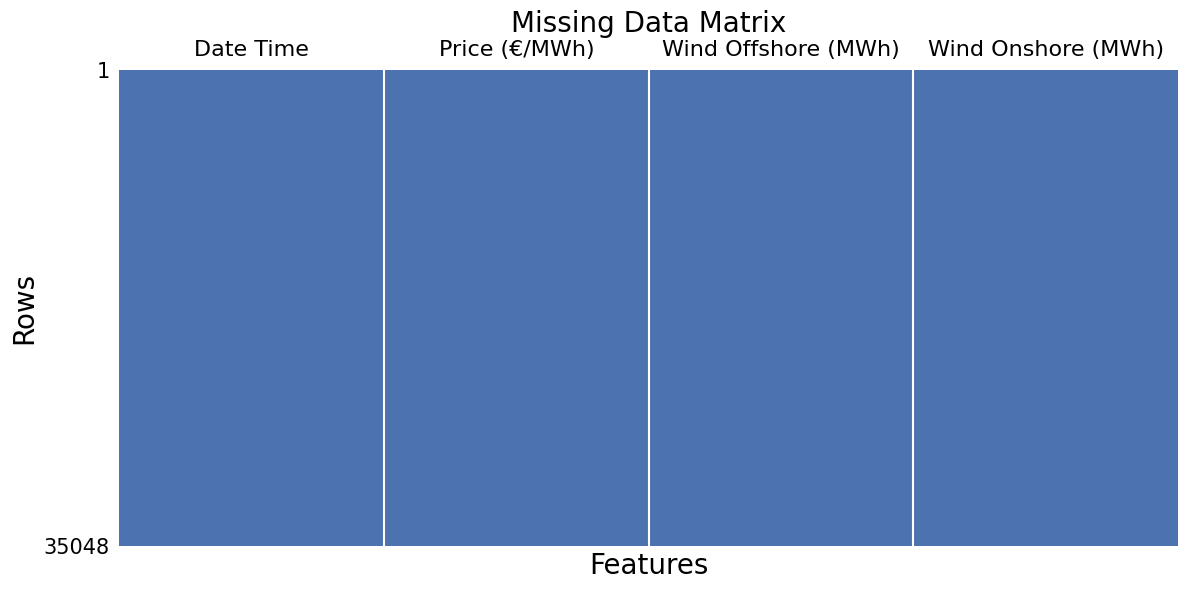

In [ ]:
# Set the color and font size
fig, ax = plt.subplots(figsize=(12, 6))
msno.matrix(df, color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725), fontsize=12, ax=ax)

# Rename the features
feature_labels = {
    'Datetime': 'Date Time',
    'Price': 'Price (€/MWh)',
    'Wind_offshore': 'Wind Offshore (MWh)',
    'Wind_onshore': 'Wind Onshore (MWh)'
}

# Adjust the x-axis tick labels
ax.set_xticks(range(len(feature_labels)))
ax.set_xticklabels(feature_labels.values(), rotation=0, fontsize=16, ha='center')

# Set the x-axis label
plt.xlabel('Features', fontsize=20)

# Set the y-axis label
plt.ylabel('Rows', fontsize=20)

# Set the plot title
plt.title('Missing Data Matrix', fontsize=20)

# Adjust plot layout
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35048 entries, 0 to 35047
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Datetime       35048 non-null  datetime64[ns]
 1   Wind_offshore  35048 non-null  object        
 2   Wind_onshore   35048 non-null  object        
 3   Price          35048 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 1.3+ MB


Here's an example of how you can convert the Wind offshore and Wind onshore columns to floats while also removing the commas:

In [ ]:
df['Wind_offshore'] = df['Wind_offshore'].str.replace(',', '').astype(float)
df['Wind_onshore'] = df['Wind_onshore'].str.replace(',', '').astype(float)

## Outlier detection

In [ ]:
# Number of outliers from the original dataset
outlier_num_list = []
for col in df.columns:
    outlier_num = df[((df[col] - df[col].mean())/ df[col].std())> 3][col].count()
    outlier_num_list.append(outlier_num)
outliers_df = pd.DataFrame(df.columns, columns = ['Features'])
outliers_df['outliers_num'] = outlier_num_list
outliers_df['outliers_perc'] = (outliers_df['outliers_num'] / len(df)) * 100
outliers_df.sort_values(by = 'outliers_perc', ascending = False)

,Features,outliers_num,outliers_perc
3,Price,360,1.027163
2,Wind_onshore,233,0.664803
0,Datetime,0,0.000000
1,Wind_offshore,0,0.000000


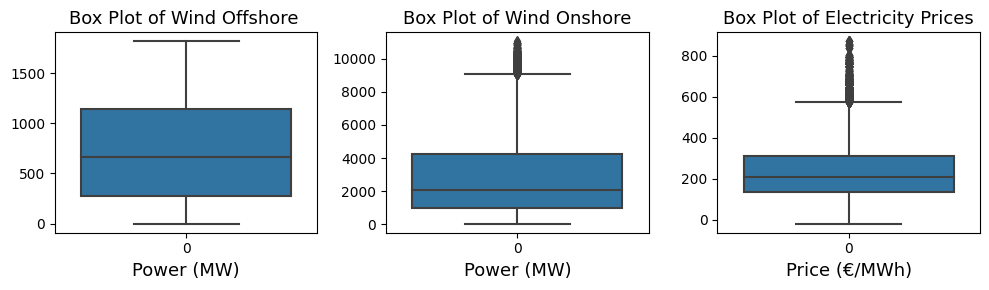

In [ ]:
# Create a 1x3 subplot grid
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

# Box plot for Wind Offshore
sns.boxplot(data=df['Wind_offshore'], ax=axes[0])
axes[0].set_title('Box Plot of Wind Offshore ', fontsize=13)
axes[0].set_xlabel('Power (MW)', fontsize=13)

# Box plot for Wind Onshore
sns.boxplot(data=df['Wind_onshore'], ax=axes[1])
axes[1].set_title('Box Plot of Wind Onshore', fontsize=13)
axes[1].set_xlabel('Power (MW)', fontsize=13)

# Box plot for Electricity Price
sns.boxplot(data=df['Price'], ax=axes[2])
axes[2].set_title('Box Plot of Electricity Prices', fontsize=13)
axes[2].set_xlabel('Price (€/MWh)', fontsize=13)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

## Basic Statistics

### Duration of Dataset

In [ ]:
print(f'The data is available from {df.Datetime.min()} to {df.Datetime.max()}')

The data is available from 2022-01-01 00:00:00 to 2022-12-31 23:45:00


In [ ]:
df.describe()

,Wind_offshore,Wind_onshore,Price
count,35048.000000,35048.000000,35048.000000
mean,706.214613,2869.835640,235.415240
std,473.785173,2392.296809,142.801643
min,0.000000,42.500000,-19.040000
25%,276.000000,996.500000,134.150000
50%,660.000000,2054.375000,208.300000
75%,1138.500000,4227.812500,310.080000
max,1815.500000,11045.000000,871.000000


In [ ]:
print(f' The maximum power generated was on \n{df.loc[df.Wind_offshore==df.Wind_offshore.max()]}')
print(f' The maximum power generated was on \n{df.loc[df.Wind_onshore==df.Wind_onshore.max()]}')
print(f' The maximum Price was on \n{df.loc[df.Price==df.Price.max()]}')

 The maximum power generated was on 
               Datetime  Wind_offshore  Wind_onshore  Price
381 2022-01-04 23:15:00         1815.5        3833.0  97.56
 The maximum power generated was on 
                Datetime  Wind_offshore  Wind_onshore  Price
4881 2022-02-20 20:15:00        1097.25       11045.0  20.02
 The maximum Price was on 
                 Datetime  Wind_offshore  Wind_onshore  Price
23112 2022-08-29 19:00:00         376.25        593.75  871.0
23113 2022-08-29 19:15:00         388.50        581.25  871.0
23114 2022-08-29 19:30:00         404.25        597.50  871.0
23115 2022-08-29 19:45:00         424.00        632.75  871.0


Observation

- The average power generation over years is 3183.56 MW. The maximum power generation is 16727 MW on 21-10-2021 @ 09:00:00.
- The highest price was €871.00/MWh and was recorded between 7pm and 8pm on  Monday 29 August

In [ ]:
print(f' The minimum power generated was on \n{df.loc[df.Wind_offshore==df.Wind_offshore.min()]}')
print(f' The minimum power generated was on \n{df.loc[df.Wind_onshore==df.Wind_onshore.min()]}')
print(f' The minimum Price was on \n{df.loc[df.Price==df.Price.min()]}')

 The minimum power generated was on 
                 Datetime  Wind_offshore  Wind_onshore   Price
11558 2022-05-01 10:30:00            0.0        178.50  177.31
11559 2022-05-01 10:45:00            0.0        185.50  177.31
11560 2022-05-01 11:00:00            0.0        198.75  176.50
11561 2022-05-01 11:15:00            0.0        209.25  176.50
11562 2022-05-01 11:30:00            0.0        212.25  176.50
...                   ...            ...           ...     ...
21174 2022-08-09 14:30:00            0.0        587.50  260.64
21175 2022-08-09 14:45:00            0.0        603.50  260.64
21176 2022-08-09 15:00:00            0.0        621.00  266.89
21177 2022-08-09 15:15:00            0.0        642.50  266.89
21178 2022-08-09 15:30:00            0.0        659.50  266.89

[77 rows x 4 columns]
 The minimum power generated was on 
                Datetime  Wind_offshore  Wind_onshore   Price
7913 2022-03-24 10:15:00           16.0          42.5  194.92
 The minimum Price was 

- The lowest price in the first quarter of 2022 was negative €19.04/MWh and was recorded between 1pm and 2pm on Sunday 20 March, during the storms. During this hour renewable generation was higher than the consumption (grid load).

- The lowest price in the first quarter of 2022 was negative €19.04/MWh and was recorded between 1pm and 2pm on Sunday 20 March, during the storms. During this hour renewable generation was higher than the consumption (grid load).

## EDA

In [ ]:
df['weekday'] = df['Datetime'].dt.day_name()
df['month'] = df['Datetime'].dt.month_name()
df['year'] = df['Datetime'].dt.year
df['hour'] = df['Datetime'].dt.hour
df['minute'] =df['Datetime'].dt.minute

In [ ]:
df.head()

,Datetime,Wind_offshore,Wind_onshore,Price,weekday,month,year,hour,minute
0,2022-01-01 00:00:00,1533.00,6433.75,50.05,Saturday,January,2022,0,0
1,2022-01-01 00:15:00,1509.50,6413.25,50.05,Saturday,January,2022,0,15
2,2022-01-01 00:30:00,1490.25,6312.50,50.05,Saturday,January,2022,0,30
3,2022-01-01 00:45:00,1442.75,6328.25,50.05,Saturday,January,2022,0,45
4,2022-01-01 01:00:00,1422.00,6212.50,41.33,Saturday,January,2022,1,0


## Visualization

<ipython-input-31-5d3c48d15315>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], ax=ax[num])
<ipython-input-31-5d3c48d15315>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], ax=ax[num])
<ipython-input-31-5d3c48d15315>:11: UserWarning: 

`distplot` is a deprecated function and

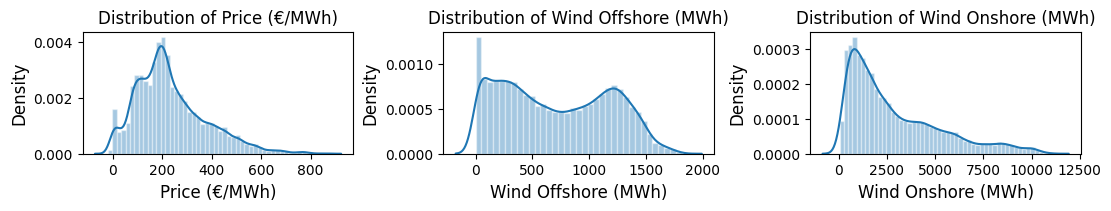

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(11, 2), constrained_layout=True)
sns.set_style("darkgrid")

features = {
    'Price': 'Price (€/MWh)',
    'Wind_offshore': 'Wind Offshore (MWh)',
    'Wind_onshore': 'Wind Onshore (MWh)'
}

for num, (col, label) in enumerate(features.items()):
    sns.distplot(df[col], ax=ax[num])
    ax[num].set_xlabel(label, fontsize=12)
    ax[num].set_ylabel("Density", fontsize=12)
    ax[num].set_title("Distribution of " + label, fontsize=12)

plt.show()


### Distribution of features

<font size=4> Observations <font>

Based on the histograms, we can observe that
- The price variable is approximately normally distributed, with the majority of prices falling between 100-300 €/MWh.
- The wind offshore variable is slightly skewed to the right, indicating that there may be some outliers in the data.
- The wind onshore variable is highly skewed to the right, with the majority of values being below 4000 MWh and a long tail of higher values.

These histograms provide an initial understanding of the distribution of the variables, which can help inform further analysis

In [ ]:

price = df["Price"]
wind_offshore = df["Wind_offshore"]
wind_onshore = df["Wind_onshore"]

mean_price = price.mean()
std_price = price.std()
skewness_price = price.skew()
kurtosis_price = price.kurtosis()

mean_wind_offshore = wind_offshore.mean()
std_wind_offshore = wind_offshore.std()
skewness_wind_offshore = wind_offshore.skew()
kurtosis_wind_offshore = wind_offshore.kurtosis()

mean_wind_onshore = wind_onshore.mean()
std_wind_onshore = wind_onshore.std()
skewness_wind_onshore = wind_onshore.skew()
kurtosis_wind_onshore = wind_onshore.kurtosis()

# create a list of dictionaries to store the statistics
stats_list = [
    {"feature": "Price", "mean": mean_price, "std": std_price, "skewness": skewness_price, "kurtosis": kurtosis_price},
    {"feature": "Wind_offshore", "mean": mean_wind_offshore, "std": std_wind_offshore, "skewness": skewness_wind_offshore, "kurtosis": kurtosis_wind_offshore},
    {"feature": "Wind_onshore", "mean": mean_wind_onshore, "std": std_wind_onshore, "skewness": skewness_wind_onshore, "kurtosis": kurtosis_wind_onshore}
]

# create a data frame from the list of dictionaries
df_stats = pd.DataFrame(stats_list)

# print the data frame
df_stats

,feature,mean,std,skewness,kurtosis
0,Price,235.415240,142.801643,0.915928,0.874535
1,Wind_offshore,706.214613,473.785173,0.168312,-1.261209
2,Wind_onshore,2869.835640,2392.296809,1.138066,0.560710


From these results, we can see that:

- The mean price of the properties in the dataset is around 235, which is measured in thousands of dollars.
- The standard deviation of the prices is around 143, which means that the prices are quite spread out.
- The skewness of the price distribution is positive, indicating that there are more high-priced properties than low-priced ones, and that the distribution has a longer right tail.
- The kurtosis of the price distribution is less than 1, indicating that it is flatter than a normal distribution.

#### Regarding the wind features:

- The mean wind offshore speed is around 706

- The standard deviation of the wind offshore speed is around 474

- The skewness of the offshore wind speed distribution is close to zero, indicating that it is approximately symmetric.

- The kurtosis of the offshore wind speed distribution is less than 0, indicating that it is flatter than a normal distribution.

- The mean wind onshore speed is around 2870

- The standard deviation of the wind onshore speed is around 2392, which means that the wind speeds are quite variable.

- The skewness of the onshore wind speed distribution is positive, indicating that there are more high-speed wind events than low-speed ones, and that the distribution has a longer right tail.

- The kurtosis of the onshore wind speed distribution is less than 1, indicating that it is flatter than a normal distribution.

These statistics provide a rough idea of the distribution of the features, which can be helpful in understanding the data and designing appropriate models.

### Summary Statistics and Visualization of Energy Market Features

<ipython-input-33-0528360d1218>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0, 0].set_xticklabels(labels, ha='center', fontsize=15)
<ipython-input-33-0528360d1218>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0, 1].set_xticklabels(labels, ha='center', fontsize=15)
<ipython-input-33-0528360d1218>:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1, 0].set_xticklabels(labels, ha='center', fontsize=15)


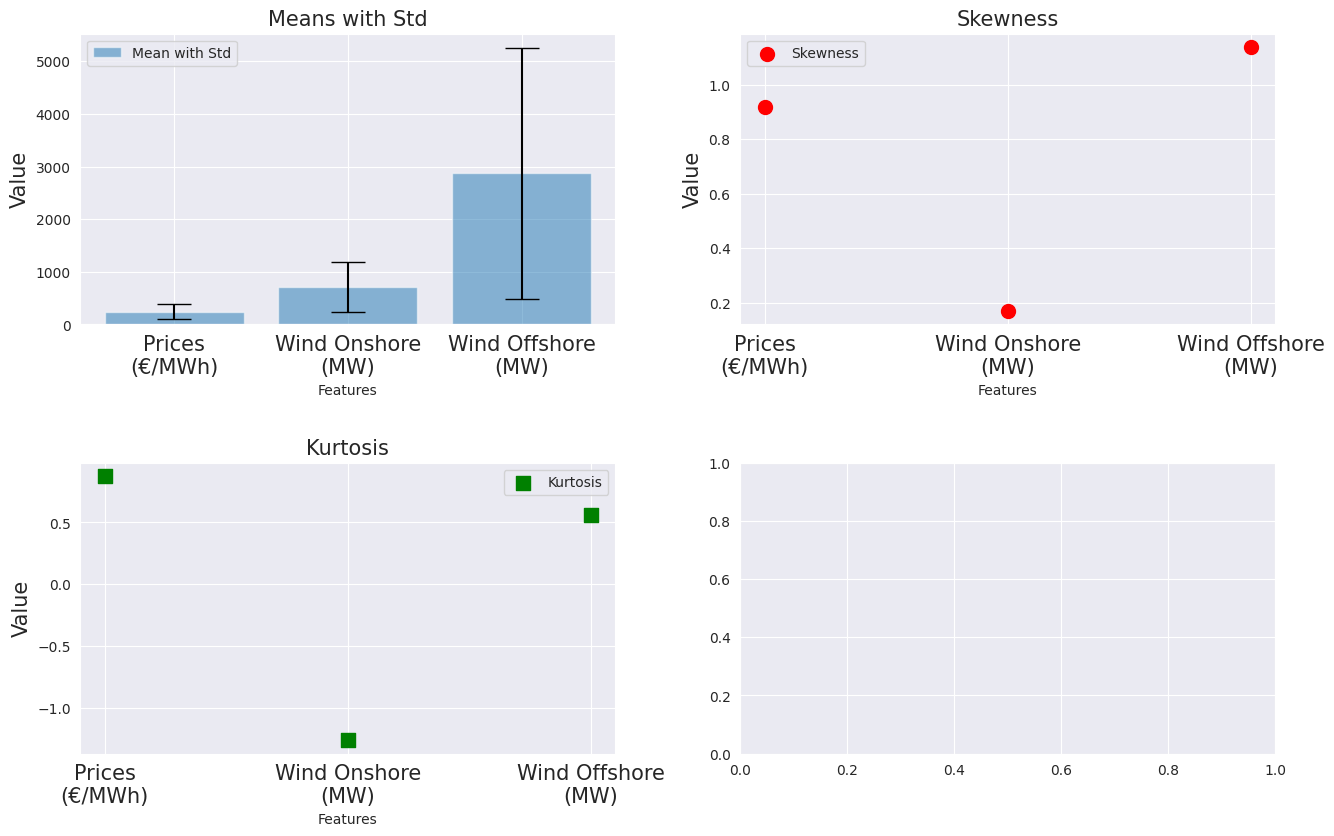

In [ ]:
# Extract the features of interest
features = ["Price", "Wind_offshore", "Wind_onshore"]
data = [df[f] for f in features]

# Compute the statistics of interest
means = [d.mean() for d in data]
stds = [d.std() for d in data]
skews = [d.skew() for d in data]
kurtosis = [d.kurtosis() for d in data]

# Set up the plot
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(14, 9))

# Plot the means with error bars
ax[0, 0].bar(features, means, yerr=stds, capsize=12, alpha=0.5)
ax[0, 0].legend(["Mean with Std"])

# Plot the skewness and kurtosis as points
ax[0, 1].scatter(features, skews, color="red", marker="o", s=100)
ax[0, 1].legend(["Skewness"])

ax[1, 0].scatter(features, kurtosis, color="green", marker="s", s=100)
ax[1, 0].legend(["Kurtosis"])

# Add labels and titles
ax[0, 0].set_xlabel("Features")
ax[0, 0].set_ylabel("Value", fontsize=15)
ax[0, 0].set_title("Means with Std", fontsize=15)

ax[0, 1].set_xlabel("Features")
ax[0, 1].set_ylabel("Value", fontsize=15)
ax[0, 1].set_title("Skewness", fontsize=15)

ax[1, 0].set_xlabel("Features")
ax[1, 0].set_ylabel("Value", fontsize=15)
ax[1, 0].set_title("Kurtosis", fontsize=15)

# Set x-axis tick labels with (MW) on a new line
labels = ["Prices\n(€/MWh)", "Wind Onshore\n(MW)", "Wind Offshore\n(MW)"]
ax[0, 0].set_xticklabels(labels, ha='center', fontsize=15)
ax[0, 1].set_xticklabels(labels, ha='center', fontsize=15)
ax[1, 0].set_xticklabels(labels, ha='center', fontsize=15)

# Adjust the layout and spacing
fig.tight_layout(pad=3.0)

# Show the plot
plt.show()


# The time series Analysis

## Wind Power Generation

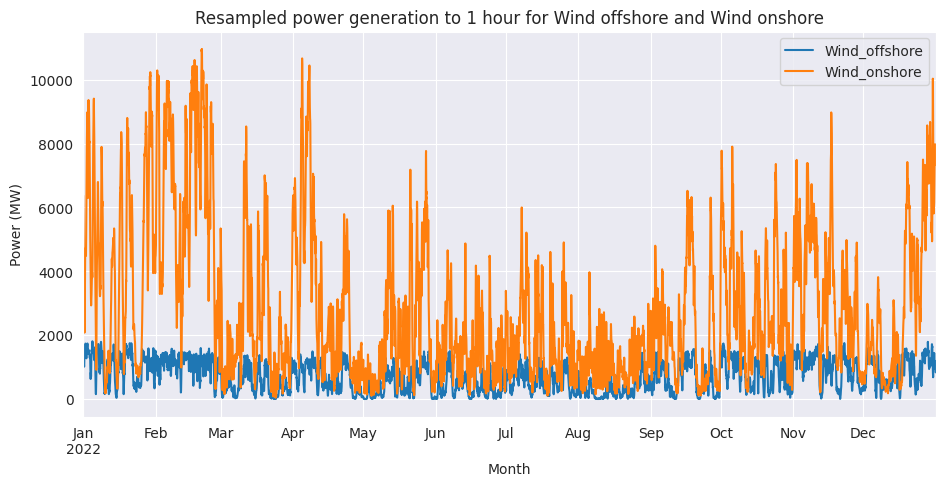

In [ ]:
group_df = (df.set_index('Datetime')).resample('H')[['Wind_offshore', 'Wind_onshore']].mean()
group_df.plot(kind='line', figsize=(11,5))
plt.xlabel('Month')
plt.ylabel('Power (MW)')
plt.title('Resampled power generation to 1 hour for Wind offshore and Wind onshore')
plt.show()

## Market - Day-ahead prices

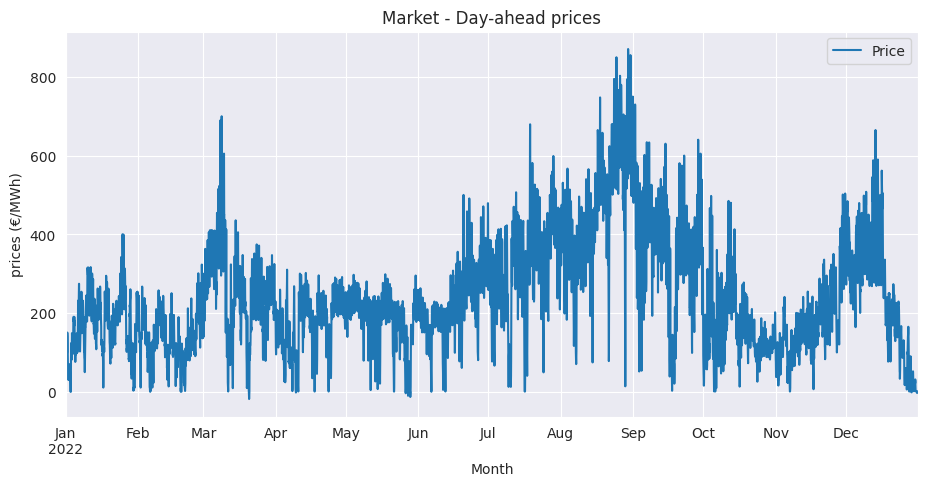

In [ ]:
group_df = (df.set_index('Datetime')).resample('H')[['Price']].mean()
group_df.plot(kind='line', figsize=(11,5))
plt.xlabel('Month')
plt.ylabel('prices (€/MWh)')
plt.title('Market - Day-ahead prices')
plt.show()

For good visualization let’s look heat map of each feature (offshore wind, onshore wind, and price)

### Wind Offshore

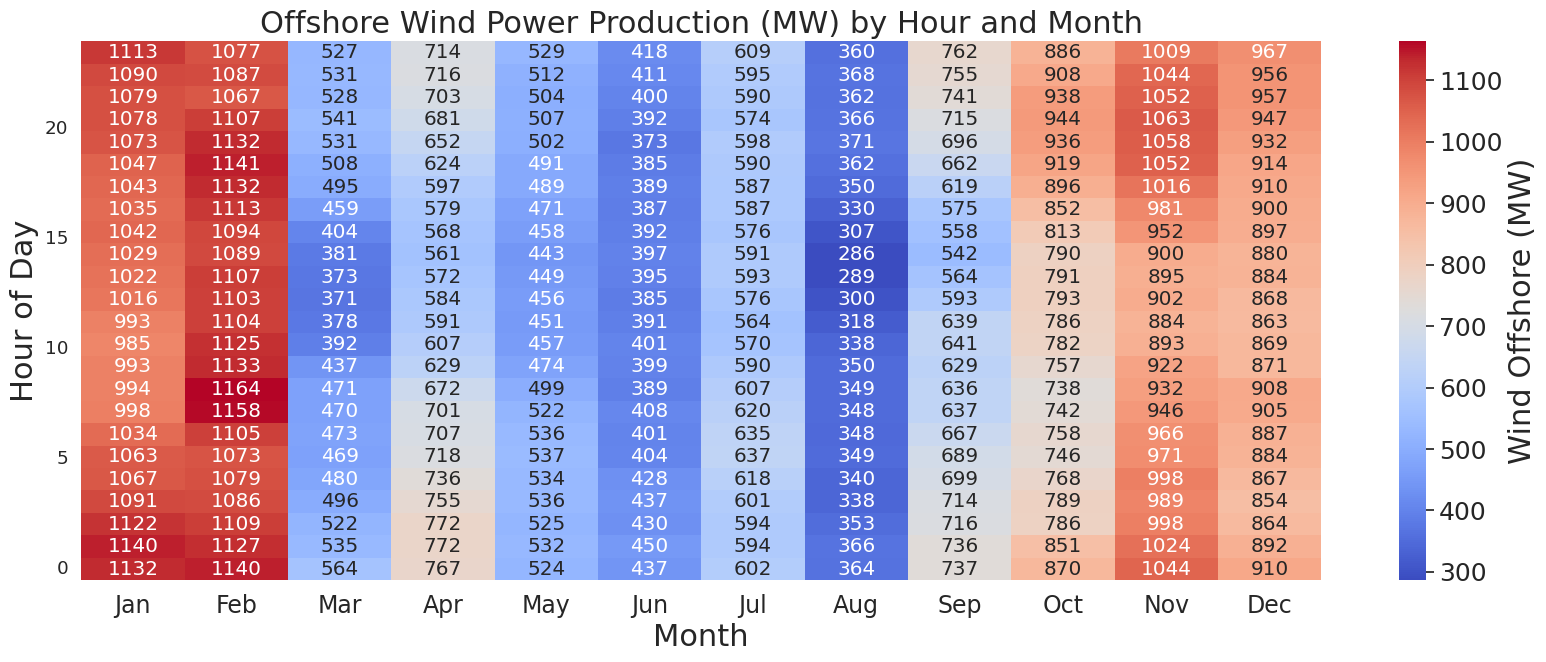

In [ ]:
# specify the order of the months
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['month'] = pd.Categorical(df['month'], categories=months, ordered=True)

# create a pivot table to summarize the data by hour and month
pivot = pd.pivot_table(df, values='Wind_offshore', index='hour', columns='month', aggfunc=np.mean)

# create the heatmap
sns.set(font_scale=1.2)
plt.figure(figsize=(20,7))
ax = sns.heatmap(pivot, cmap='coolwarm', annot=True, fmt=".0f", cbar_kws={'label': 'Wind 0ffshore(MW)'})
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=18)  # Adjust the font size of the colorbar ticks
cbar.set_label('Wind Offshore (MW)', fontsize=22)  # Adjust the font size of the colorbar label
plt.title('Offshore Wind Power Production (MW) by Hour and Month', fontsize=22)
plt.xlabel('Month', fontsize=22)
plt.ylabel('Hour of Day', fontsize=22)
yticks = np.array([0, 5, 10, 15, 20]) + 0.5
ax.yaxis.set_ticks(yticks * 24 / 24.5)
ax.set_yticklabels([f"{i}" for i in [0, 5, 10, 15, 20]])
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0, fontsize=17)
ax.invert_yaxis()
plt.show()

The plot shows a heatmap of offshore wind power production (MW) by hour of the day and month of the year. The y-axis represents the hour of the day, and the x-axis represents the month of the year. The color of each cell in the heatmap represents the average offshore wind power production in MW for that hour and month. The darker shades of red indicate higher wind power production, while the darker shades of blue indicate lower wind power production. The annotations in each cell represent the average wind power production in MW for that hour and month.

Overall, the plot shows that offshore wind power production is highest during the winter months (December-February) and lowest during the summer months (June-August). Within each month, wind power production varies throughout the day, with peaks occurring in the early morning hours and late afternoon/evening hours.

### Wind Onshore

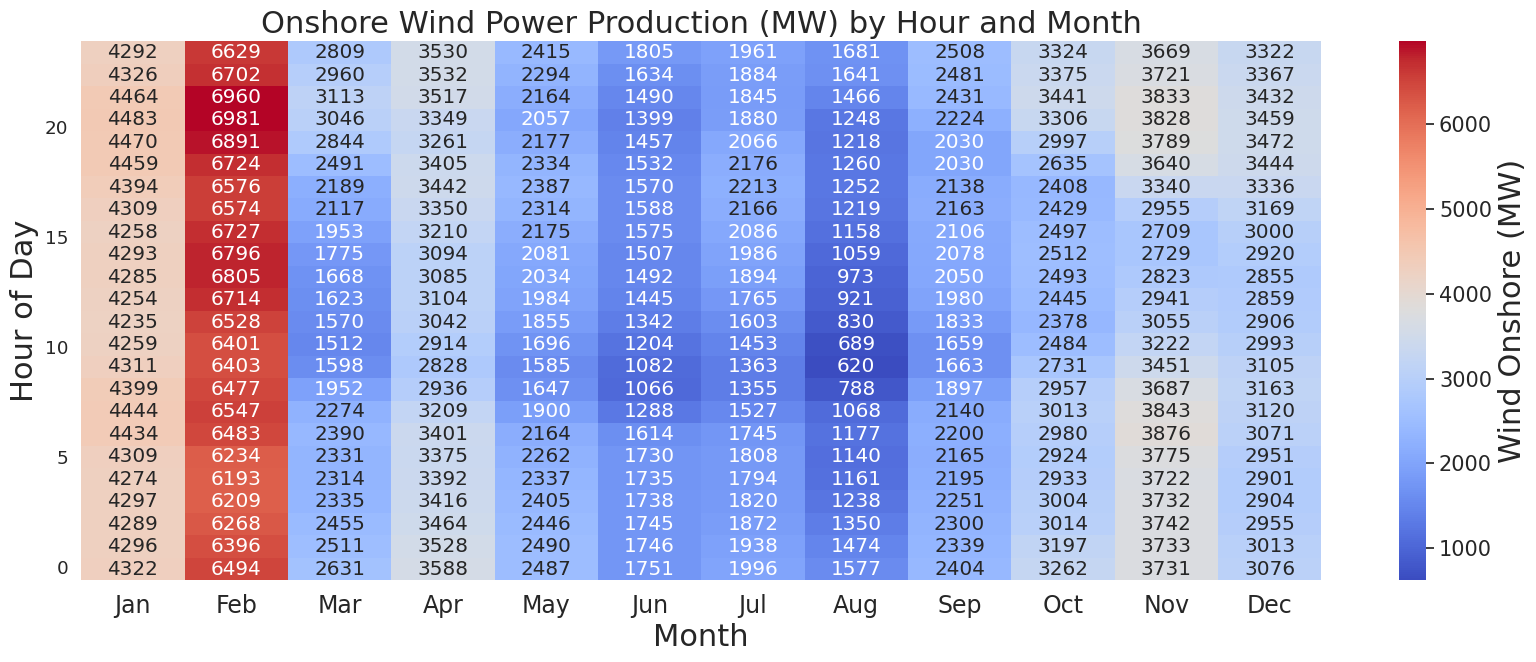

In [ ]:
# specify the order of the months
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['month'] = pd.Categorical(df['month'], categories=months, ordered=True)

# create a pivot table to summarize the data by hour and month
pivot = pd.pivot_table(df, values='Wind_onshore', index='hour', columns='month', aggfunc=np.mean)

# create the heatmap
sns.set(font_scale=1.2)
plt.figure(figsize=(20,7))
ax = sns.heatmap(pivot, cmap='coolwarm', annot=True, fmt=".0f", cbar_kws={'label': 'Wind onshore(MW)'})
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=18)  # Adjust the font size of the colorbar ticks
cbar.set_label('Wind Onshore (MW)', fontsize=22)  # Adjust the font size of the colorbar label
plt.title('Onshore Wind Power Production (MW) by Hour and Month', fontsize=22)
plt.xlabel('Month', fontsize=22)
plt.ylabel('Hour of Day', fontsize=22)
yticks = np.array([0, 5, 10, 15, 20]) + 0.5
ax.yaxis.set_ticks(yticks * 24 / 24.5)
ax.set_yticklabels([f"{i}" for i in [0, 5, 10, 15, 20]])
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0, fontsize=17)
ax.invert_yaxis()

# Increase font size of the pivot name
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)

plt.show()

The plot shows that wind power production from onshore turbines varies throughout the year and peaks in the winter months (**December - February**) during the late afternoon and evening hours. There is a dip in production during the midday hours. In contrast, the summer months (**June - August**) have lower wind power production levels, especially during the early morning and late evening hours.

The plot also shows that wind power production varies by time of day, with the highest production levels occurring in the late afternoon and early evening hours, and lower production levels during the early morning and midday hours.

## Electricity Price

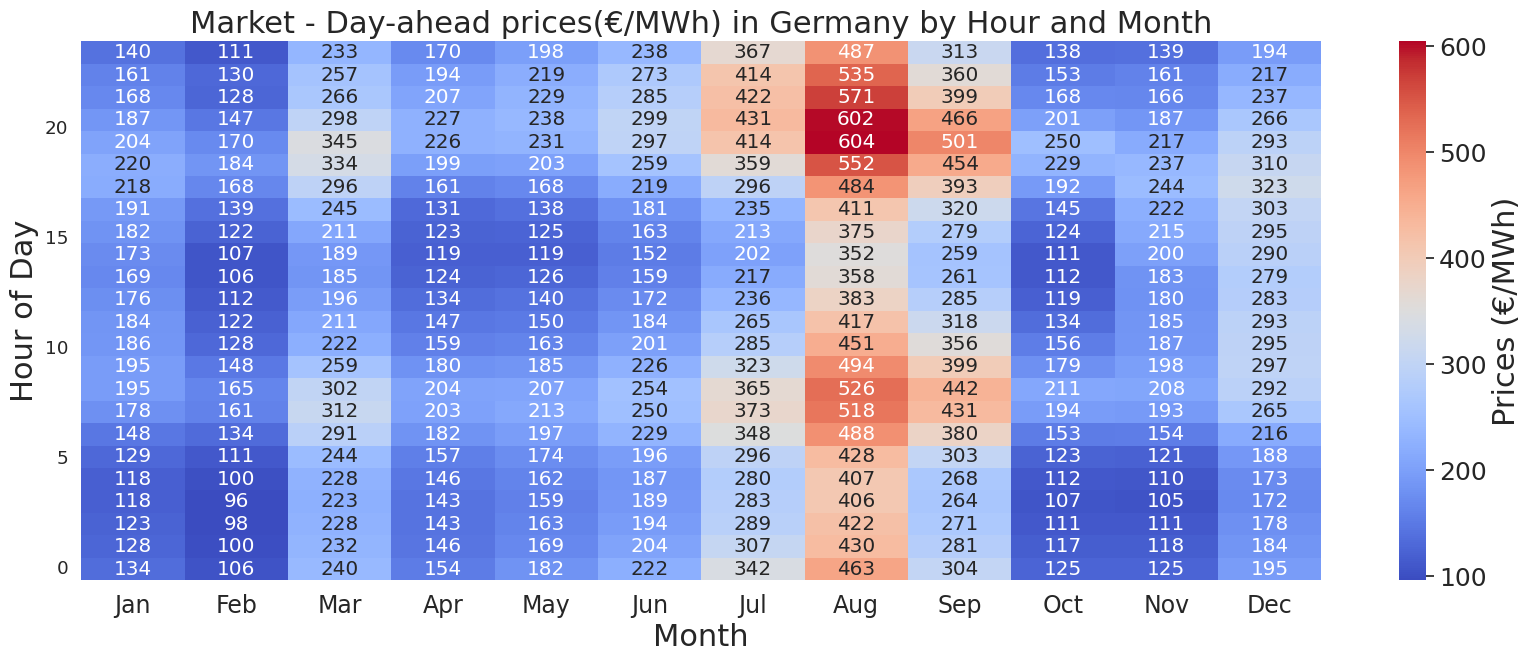

In [ ]:
# specify the order of the months
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['month'] = pd.Categorical(df['month'], categories=months, ordered=True)

# create a pivot table to summarize the data by hour and month
pivot = pd.pivot_table(df, values='Price', index='hour', columns='month', aggfunc=np.mean)

# create the heatmap
sns.set(font_scale=1.2)
plt.figure(figsize=(20,7))
ax = sns.heatmap(pivot, cmap='coolwarm', annot=True, fmt=".0f", cbar_kws={'label': 'Prices (€/MWh)'})
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=18)  # Adjust the font size of the colorbar ticks
cbar.set_label('Prices (€/MWh)', fontsize=22)  # Adjust the font size of the colorbar label
plt.title('Market - Day-ahead prices(€/MWh) in Germany by Hour and Month', fontsize=22)
plt.xlabel('Month', fontsize=22)
plt.ylabel('Hour of Day', fontsize=22)
yticks = np.array([0, 5, 10, 15, 20]) + 0.5
ax.yaxis.set_ticks(yticks * 24 / 24.5)
ax.set_yticklabels([f"{i}" for i in [0, 5, 10, 15, 20]])
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0, fontsize=17)
ax.invert_yaxis()
plt.show()


### Monthly Trend of Wind Offshore and Onshore Generation

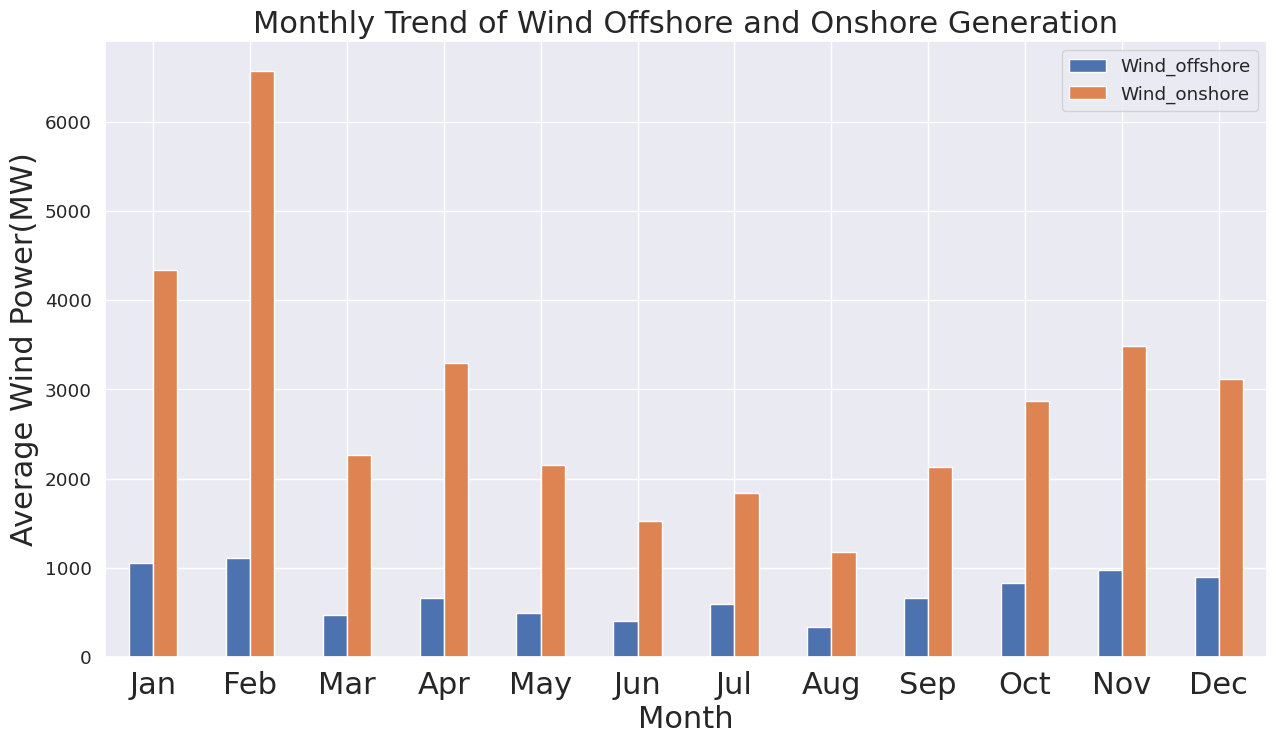

In [ ]:
# Specify the order of the months
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['month'] = pd.Categorical(df['month'], categories=months, ordered=True)

# Group the data by month of the year and calculate the mean Wind offshore and Wind onshore generation for each month
df_monthly = df.groupby(df['month'])[['Wind_offshore', 'Wind_onshore']].mean()

# Plot the monthly trend of Wind offshore and Wind onshore generation
fig, axes = plt.subplots(1, 1, figsize=(15, 8))
df_monthly.plot(kind='bar', ax=axes)
axes.set_xlabel('Month', fontsize=22)
axes.set_ylabel('Average Wind Power(MW)', fontsize=22)
axes.set_title('Monthly Trend of Wind Offshore and Onshore Generation', fontsize=22)
axes.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0, fontsize=22)
plt.show()

### Monthly Trend of Electricity Price

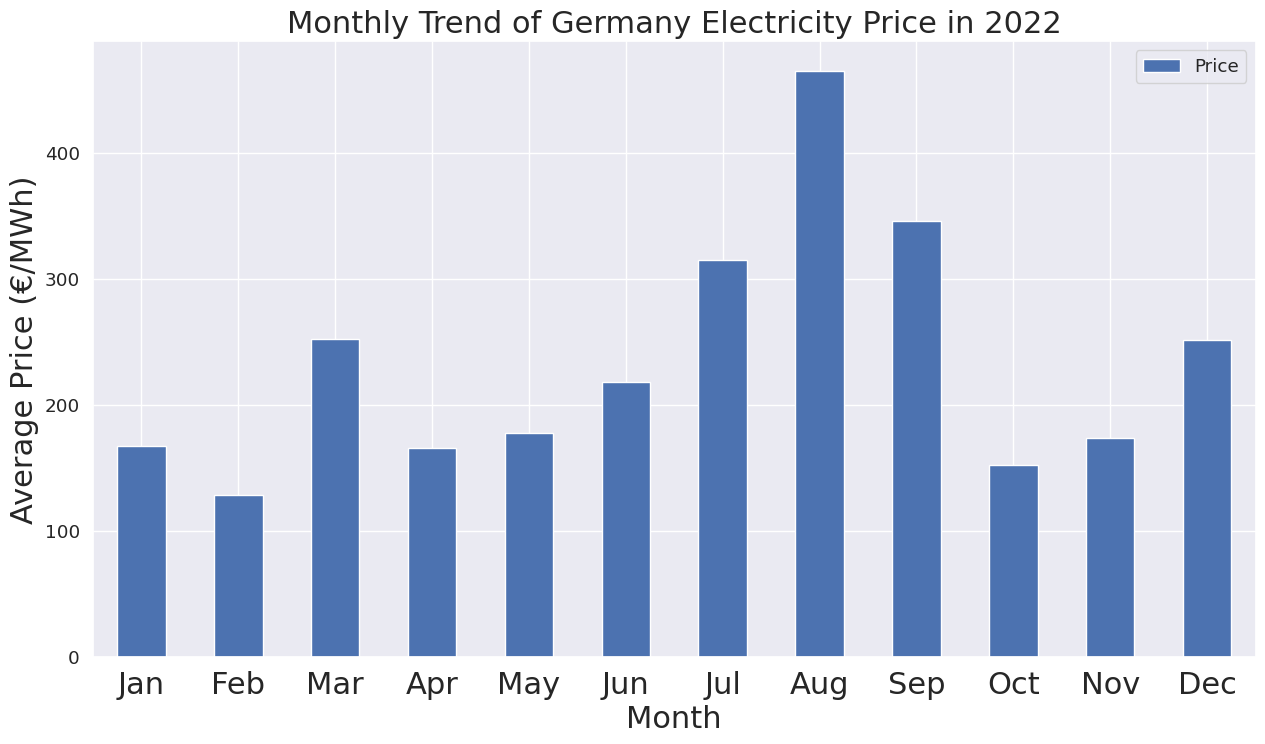

In [ ]:
# Specify the order of the months
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['month'] = pd.Categorical(df['month'], categories=months, ordered=True)

# Group the data by month of the year and calculate the mean Wind offshore and Wind onshore generation for each month
df_monthly = df.groupby(df['month'])[['Price']].mean()

# Plot the monthly trend of Wind offshore and Wind onshore generation
fig, axes = plt.subplots(1, 1, figsize=(15, 8))
df_monthly.plot(kind='bar', ax=axes)
axes.set_xlabel('Month', fontsize=22)
axes.set_ylabel('Average Price (€/MWh)', fontsize=22)
axes.set_title('Monthly Trend of Germany Electricity Price in 2022', fontsize=22)
axes.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0, fontsize=22)
plt.show()

### Hourly trend of Wind offshore and onshore generation on January 04, 2022 (The maximum power generated)

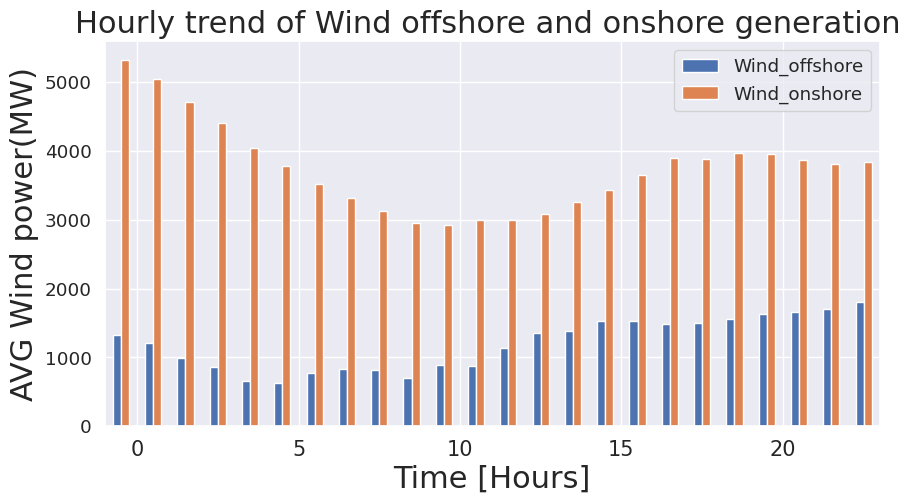

In [ ]:
# Filter the data to include only records for January 04, 2022
df1 = df.loc[df['Datetime'].dt.date == pd.Timestamp('2022-01-04').date()]

# Group the data by hour of the day and calculate the mean Wind offshore and Wind onshore generation for each hour
df_hourly = df1.groupby(df1['Datetime'].dt.hour)[['Wind_offshore', 'Wind_onshore']].mean()

# Plot the hourly trend of Wind offshore and Wind onshore generation
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
df_hourly.plot(kind='bar', ax=axes)
axes.set_xlabel('Time [Hours]', fontsize=22)
axes.set_ylabel('AVG Wind power(MW)', fontsize=22)
axes.set_title('Hourly trend of Wind offshore and onshore generation ', fontsize=22)
xticks = np.array([0, 5, 10, 15, 20]) + 0.5
axes.xaxis.set_ticks(xticks)
axes.set_xticklabels([f"{i}" for i in [0, 5, 10, 15, 20]],rotation=0, fontsize=15)
axes.locator_params(axis='x', nbins=5)
plt.show()

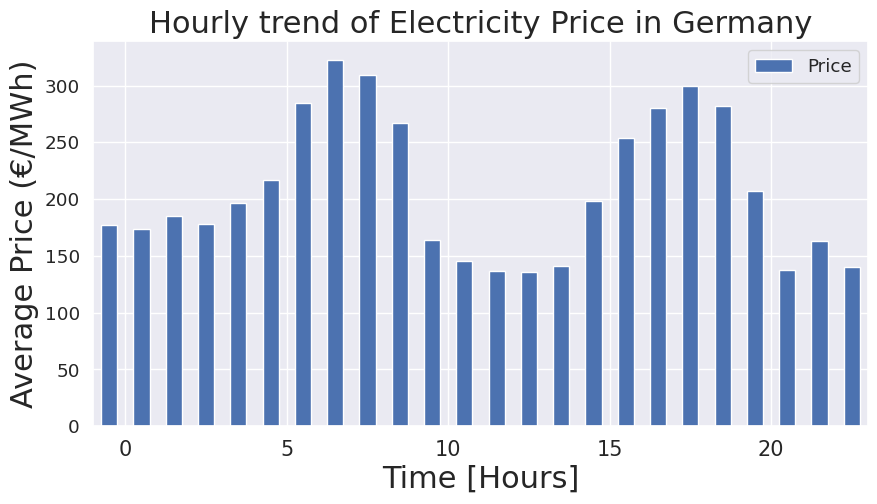

In [ ]:
# Filter the data to include only records for February 28, 2022
df1 = df.loc[df['Datetime'].dt.date == pd.Timestamp('2022-02-28').date()]

# Group the data by hour of the day and calculate the mean Wind offshore and Wind onshore generation for each hour
df_hourly = df1.groupby(df1['Datetime'].dt.hour)[['Price']].mean()

# Plot the hourly trend of Wind offshore and Wind onshore generation
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
df_hourly.plot(kind='bar', ax=axes)
axes.set_xlabel('Time [Hours]', fontsize=22)
axes.set_ylabel('Average Price (€/MWh)', fontsize=22)
axes.set_title('Hourly trend of Electricity Price in Germany', fontsize=22)
xticks = np.array([0, 5, 10, 15, 20]) + 0.5
axes.xaxis.set_ticks(xticks)
axes.set_xticklabels([f"{i}" for i in [0, 5, 10, 15, 20]],rotation=0, fontsize=15)
axes.locator_params(axis='x', nbins=5)
plt.show()

The plot shows that wind power generation from both offshore and onshore sources varies throughout the day. The highest generation occurs during the **early morning hours** and **late afternoon**, which could be due to the fact that wind speeds are typically higher during these times. There is a dip in generation during the **midday hours**, which could be due to lower wind speeds and increased cloud cover during this time. Additionally, the plot also shows that wind power generation from the onshore source is generally higher than that from the offshore source throughout the day.

Overall, the plot shows that onshore wind power production is highest during the winter months (December-February) and lowest during the summer months (June-August). Within each month, wind power production varies throughout the day, with peaks occurring in the early morning hours and late afternoon/evening hours.

## Weekly Fluctuations in Average Electricity Prices in the German Market (2022)

<ipython-input-43-671da6e51b76>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekly_avg = df.groupby(['year', 'month', 'weekday']).mean().reset_index()
<ipython-input-43-671da6e51b76>:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=weekly_avg, x='weekday', y='Price', hue='year', ci=None, palette=colors)


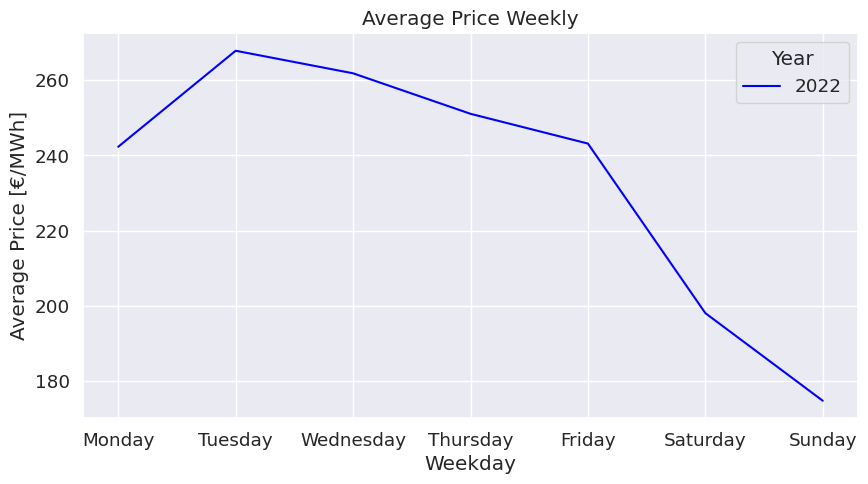

In [ ]:
# Calculate average wind power and price on a weekly basis
weekly_avg = df.groupby(['year', 'month', 'weekday']).mean().reset_index()

# Define custom color palette
colors = ['blue']

# Define the order of weekdays
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert 'weekday' column to categorical with the desired order
weekly_avg['weekday'] = pd.Categorical(weekly_avg['weekday'], categories=weekday_order, ordered=True)

# Sort the dataframe by the ordered 'weekday' column
weekly_avg.sort_values('weekday', inplace=True)

# Plot average price on a weekly basis with custom line colors
plt.figure(figsize=(10, 5))
sns.lineplot(data=weekly_avg, x='weekday', y='Price', hue='year', ci=None, palette=colors)
plt.title('Average Price Weekly')
plt.xlabel('Weekday')
plt.ylabel('Average Price [€/MWh]')
plt.legend(title='Year')

plt.show()


### A histogram of increments of wind energy for different time intervals, such as 15 minutes or 1 hour,

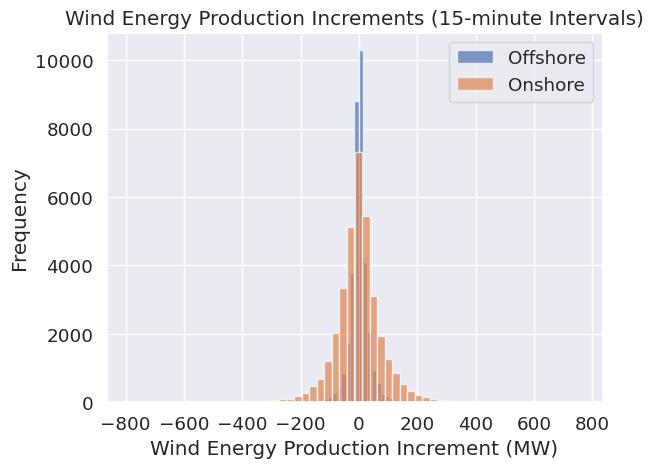

In [ ]:
# Calculate increments of wind energy production (15-minute intervals)
df["Offshore Increment"] = df["Wind_offshore"].diff()
df["Onshore Increment"] = df["Wind_onshore"].diff()

# Create histogram of wind energy production increments (15-minute intervals)
df["Offshore Increment"].hist(bins=60, alpha=0.7, label="Offshore")
df["Onshore Increment"].hist(bins=60, alpha=0.7, label="Onshore")
plt.title("Wind Energy Production Increments (15-minute Intervals)")
plt.xlabel("Wind Energy Production Increment (MW)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [ ]:
df = df.set_index("Datetime")

<ipython-input-46-6c53065330b5>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_diff_1h = df.resample("1H").mean().diff()


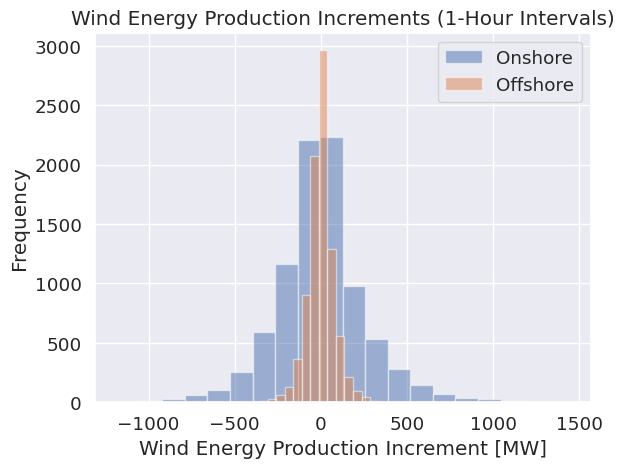

In [ ]:

# calculate wind energy production increments at 1-hour intervals
df_diff_1h = df.resample("1H").mean().diff()

# generate histogram of increments at 1-hour intervals
plt.hist(df_diff_1h["Wind_onshore"], bins=20, alpha=0.5, label="Onshore")
plt.hist(df_diff_1h["Wind_offshore"], bins=20, alpha=0.5, label="Offshore")
plt.title("Wind Energy Production Increments (1-Hour Intervals)")
plt.xlabel("Wind Energy Production Increment [MW]")
plt.ylabel("Frequency")
plt.legend()
plt.show()

## Correlation Analysis

In [ ]:
# calculate the correlation matrix between the columns of interest
corr_matrix = df[['Price', 'Wind_offshore', 'Wind_onshore']].corr()

# print the correlation matrix
print(corr_matrix)

                  Price  Wind_offshore  Wind_onshore
Price          1.000000      -0.427535     -0.563224
Wind_offshore -0.427535       1.000000      0.676709
Wind_onshore  -0.563224       0.676709      1.000000


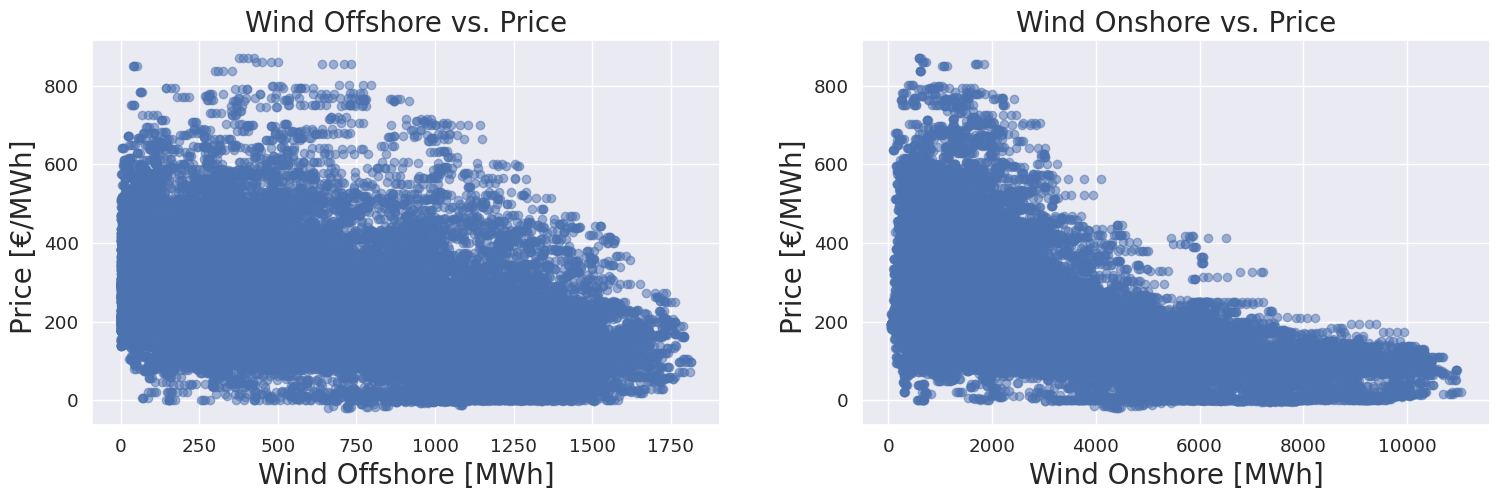

In [ ]:
# Extract the features of interest
price = df["Price"]
wind_offshore = df["Wind_offshore"]
wind_onshore = df["Wind_onshore"]

# Create a figure with 2 subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plot the scatter plots for each feature
ax[0].scatter(wind_offshore, price, alpha=0.5)
ax[0].set_title("Wind Offshore vs. Price", fontsize=20)
ax[0].set_xlabel("Wind Offshore [MWh]", fontsize=20)
ax[0].set_ylabel("Price [€/MWh] ", fontsize=20)

ax[1].scatter(wind_onshore, price, alpha=0.5)
ax[1].set_title("Wind Onshore vs. Price", fontsize=20)
ax[1].set_xlabel("Wind Onshore [MWh]", fontsize=20)
ax[1].set_ylabel("Price [€/MWh] ", fontsize=20)

# Adjust the layout and spacing
fig.tight_layout(pad=3.0)

# Show the plot
plt.show()


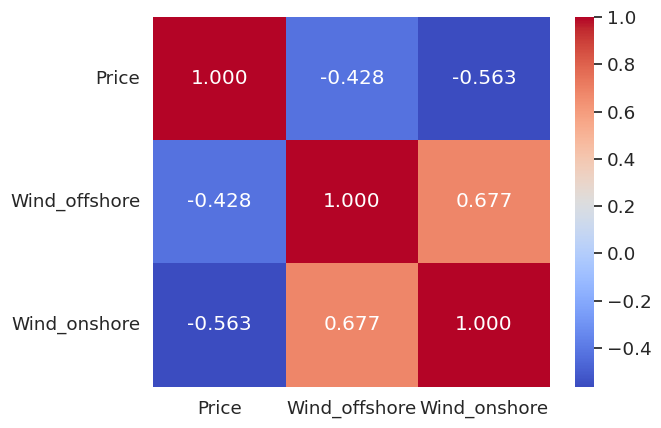

In [ ]:
# Select columns of interest
cols = ['Price', 'Wind_offshore', 'Wind_onshore']
df_subset = df[cols]

# Calculate correlation matrix
corr = df_subset.corr()

# Plot correlation matrix as heatmap
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.3f')

# Show plot
plt.show()

Certainly! The resulting correlation matrix shows the pairwise correlations between the three columns of the dataframe: Price, Wind_offshore, and Wind_onshore. The values in the correlation matrix range between -1 and 1, where a value of 1 indicates a perfect positive correlation (i.e., the two variables move together in the same direction), a value of -1 indicates a perfect negative correlation (i.e., the two variables move in opposite directions), and a value of 0 indicates no correlation (i.e., the two variables are independent).

Here's what the correlation matrix means for this specific dataset:

- The correlation coefficient between **``Price``** and **``Wind_offshore``** is -0.427535, which indicates a moderate negative correlation between the two variables. This means that as Wind_offshore **increases**, Price tends to **decrease**, and vice versa.

- The correlation coefficient between **``Price``** and **``Wind_onshore``** is -0.563224, which indicates a stronger negative correlation between the two variables. This means that as Wind_onshore **increases**, Price tends to **decrease**, and vice versa.

- The correlation coefficient between **``Wind_offshore``** and **``Wind_onshore``** is 0.676709, which indicates a moderate positive correlation between the two variables. This means that as Wind_offshore increases, Wind_onshore tends to increase as well, and vice versa.

In summary, the correlation matrix suggests that there is a negative relationship between the wind power generation and the price. This makes sense because when there is more wind power being generated, it is likely that the electricity supply is high, and the price may be lower due to the excess supply. Conversely, when there is less wind power being generated, the electricity supply may be lower, and the price may be higher due to the increased demand.

# The Gaussian distribution

### 3D plot

<ipython-input-50-aad6cb89ad18>:15: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 12  # Increase this value to adjust the plot's aspect ratio


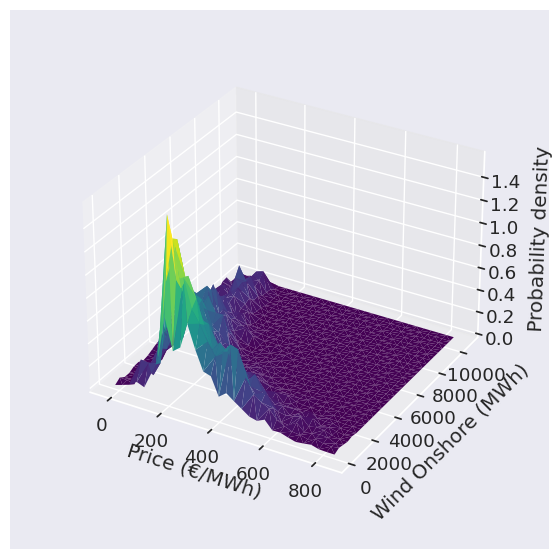

In [ ]:
# Calculate joint pmf
H, xedges, yedges = np.histogram2d(price, wind_onshore, bins=30, density=True)
X, Y = np.meshgrid(xedges[:-1], yedges[:-1])
Z = H.T

# Plot the joint pmf in a 3D plot
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(X.flatten(), Y.flatten(), Z.flatten(), cmap='viridis', edgecolor='none')
ax.set_xlabel("Price (€/MWh)")
ax.set_ylabel("Wind Onshore (MWh)", labelpad=10)
ax.set_zlabel("Probability density", labelpad=10)

# Adjust the aspect ratio
ax.dist = 12  # Increase this value to adjust the plot's aspect ratio

plt.show()


### [Contour plot](https://ubc-mds.github.io/DSCI_551_stat-prob-dsci/lectures/dependence.html)

Standard deviation of Price: 142.79960547470986
Standard deviation of Wind Onshore: 2392.262679877327
Covariance of two features: -192410.88224953282


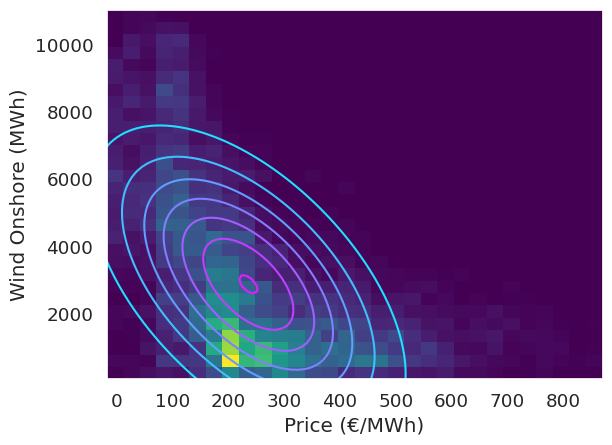

In [ ]:
from scipy.stats import pearsonr, multivariate_normal
# Calculate standard deviations and covariance
sigma1 = np.std(price)
sigma2 = np.std(wind_onshore)
cov = np.cov(price, wind_onshore)[0, 1]
print("Standard deviation of Price:", sigma1)
print("Standard deviation of Wind Onshore:", sigma2)
print("Covariance of two features:", cov)

# Fit 2-variate Gaussian
mean = [np.mean(price), np.mean(wind_onshore)]
covariance = [[sigma1 ** 2, cov], [cov, sigma2 ** 2]]
gaussian = multivariate_normal(mean=mean, cov=covariance)

# Create meshgrid for contour plot
x = np.linspace(price.min(), price.max(), 100)
y = np.linspace(wind_onshore.min(), wind_onshore.max(), 100)
Xgrid, Ygrid = np.meshgrid(x, y)
pos = np.empty(Xgrid.shape + (2,))
pos[:, :, 0] = Xgrid
pos[:, :, 1] = Ygrid
Zfit = gaussian.pdf(pos)

# Check if 2-variate Gaussian is a good model
plt.contour(Xgrid, Ygrid, Zfit, cmap='cool')
plt.hist2d(price, wind_onshore, bins=30, cmap='viridis')
plt.xlabel("Price (€/MWh)")
plt.ylabel("Wind Onshore (MWh)")
plt.show()
